In [13]:
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Initializing the data
mu = [[2, 5],
          [8, 1],
          [5, 3]]
cov = [[[2, 0], [0, 2]],
           [[3, 1], [1, 3]],
           [[2, 1], [1, 2]]]

def Generate_Data(mu_s, cov_s, label_sampels_size):
    dataset = pd.DataFrame(data={'X1': [], 'X2': [], 'Y': []})
    for i, mu_cov in enumerate(zip(mu_s, cov_s)):
        mu, cov = mu_cov
        x1, x2 = np.random.multivariate_normal(mu, cov, label_sampels_size).T
        temp = pd.DataFrame(
            data={'X1': x1, 'X2': x2, 'Y': [i]*label_sampels_size})
        dataset = pd.concat([dataset, temp], axis=0)
    return dataset

dataset = Generate_Data(mu, cov, 500)
dataset = np.array(dataset.iloc[:, :2].copy())

dataset
N = np.size(dataset, 1)

dataset.shape[0]

1500

In [2]:

#Parzen window Boundary function 
def Window(length, bandwidth):
    if np.abs(length) <= np.abs(bandwidth):
        return 1
    else:
        return 0


In [3]:

#Product of 1D kernels
def ProductKernel(dataPoint, x, bandwidth):
    dimension = len(dataPoint)
    prod = 1
    for j in range(dimension):
        prod = prod * Window((x[j]-dataPoint[j]), bandwidth)
    return prod


In [39]:

#extending and normalizing the kernel
def KDE(dataset, h,X_2d):
    N = np.size(dataset, 0)
    d = np.size(dataset, 1)  
    probs = []
    for x in X_2d:
        px = 1/N * 1/(h**d) * np.sum([ProductKernel(dataPoint, x, h) for dataPoint in dataset])
        probs.append(px) 

    return probs
dataset.shape

(1500, 2)

(2500, 2)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


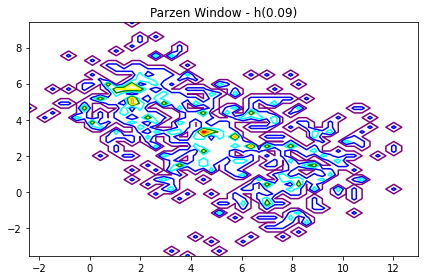

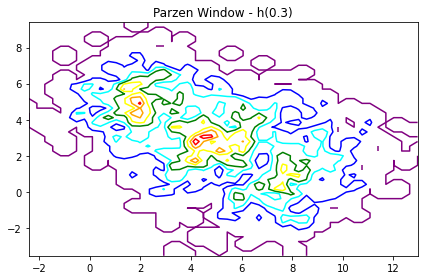

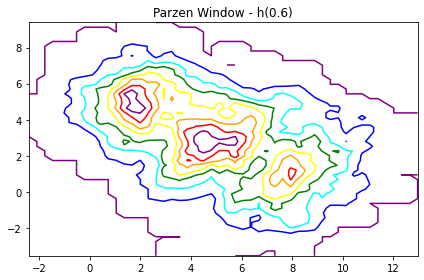

In [42]:

#plotting the contour plot of derived probabilities
Hs = [0.09, 0.3, 0.6]

x = np.linspace(np.amin(dataset[:, 0]), np.amax(
    dataset[:, 0]), 50).reshape(-1, 1)
y = np.linspace(np.amin(dataset[:, 1]), np.amax(
    dataset[:, 1]), 50).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
X_2d = np.concatenate(
    [xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1)], axis=1)
print(X_2d.shape)

ZZ = []
for h in Hs:
    probs = KDE(dataset, h,X_2d)
    zz = np.array(probs).reshape(xx.shape)
    ZZ.append(zz)

# plot estimated KDE
for i in range(len(Hs)):
    fig, ax = plt.subplots(1)
    print(ZZ[i])
    ax.contour(xx, yy, ZZ[i], colors= ['purple','blue','cyan', 'green', 'yellow', 'orange', 'red'])
    ax.set_title('Parzen Window - h('+str(Hs[i])+')')
    fig.tight_layout()
    

In [49]:
ZZ[]

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [14]:

x = np.linspace(np.amin(dataset[:, 0]), np.amax(
    dataset[:, 0]), 50).reshape(-1, 1)
y = np.linspace(np.amin(dataset[:, 1]), np.amax(
    dataset[:, 1]), 50).reshape(-1, 1)

In [25]:
np.amin(dataset[:, 1])

-3.5575405201759143

In [26]:
min(dataset[:, 1])

-3.5575405201759143

In [38]:
dataset[:,0]

array([1.88449225, 3.8649708 , 3.0104708 , ..., 5.30159669, 3.31734721,
       5.20270793])